# 특정 키워드로 word2Vec 단어 유사도 보기

In [1]:
!pip show soynlp

Name: soynlp
Version: 0.0.45
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /Users/corazzon/codes/jupyter/lib/python3.6/site-packages
Requires: numpy, psutil
Required-by: 


In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
df = pd.read_csv('data/petition.csv', parse_dates=['start', 'end'])

In [4]:
# 관심사별로 텍스트 데이터를 학습시키기 위한 목적도 있지만 전체 텍스트를 돌렸을 때 빠르게 결과를 얻기 위해서 샘플링 하려는 의도도 있습니다.
p = r'.*(P2P|은행|금융|주식|증권|공매도).*'
finance = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
finance.shape

(9876, 8)

In [5]:
finance.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이..."
54,77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,..."
68,91,2017-08-20,2017-09-19,0,165,경제민주화,증권 자본시장개정안(상장폐지법 개정안),존경하는 문제인 대통령님께\n먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니...
100,124,2017-08-20,2017-08-27,0,1,기타,포스코 관련,안녕하십니까?\n최근 뉴스에 주목을 못 받는 뉴스가 있습니다. 아시아경제tv의 포스...


In [6]:
finance.tail()

,article_id,start,end,answered,votes,category,title,content
192176,242610,2018-05-24,2018-06-23,0,0,경제민주화,전기통신 금융사기 피해방지 및 피해금 환급에 관한 특별법 수정,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192179,242614,2018-05-24,2018-06-23,0,1,기타,잘못된 법이 억울한 상황을 만들고 있는 것을 고쳐주셔요.,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192190,242633,2018-05-24,2018-06-23,0,20401,행정,2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.,2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.\n국민의...
192250,242718,2018-05-24,2018-06-23,0,14,기타,잘못 제정된 법의 피해를 막아주세요.,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192307,242801,2018-05-24,2018-06-23,0,7,경제민주화,범죄집단 삼성증권과 삼성바이오로직스 처벌바랍니다.,위조주식 찍어낸 삼성증권\n적자기업을 박근혜와 최순실에 의해 상장한 분식회계의 삼성...


In [7]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 192190

In [8]:
sample_title = finance['title'][sample_index]
sample_title

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.'

In [9]:
sample_content = finance['content'][sample_index]
sample_content

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.\\n국민의 일원으로써, 일선지자체의 공무원으로써,\\n2009년도부터 실시되어 현재까지 시행중인 적폐 제도, 신속(조기,균형) 집행의 폐지를 청원합니다.\\n2008년 리먼사태로 세계 금융위기가 발생하였다는 이유로 2009년도에 시작된 조기집행...\\n(지극히 제 개인적인 생각입니다다만. 지나고 나서 돌아보니, 솔직히 그것 때문에 시작했다고 생각이 들지 않습니다.)\\n어찌되었든, 현재까지 10년동안 그 제도같지 않은 제도가 이름만 달리하면서(조기→균형→신속) 시행되고 있는 것으로 보아,\\n우리 국가는 매년을 급박한 경제위기속에서 신속(조기)집행으로 버티어 내고 있는 중인 것으로 보입니다.\\n또한, 해당 제도 시행의 근거로 제시되는 「상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응」에 따르면, 우리 국가는 금방이라도 부도가 날 지경인 것 같습니다.\\n현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다.\\n지난 10년동안 각종 폐해와 문제점이 지적되고 있음에도, 도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다.\\n각종 언론매체 등을 통해 제기된 부작용을 나열하면,\\n“단기간 과다한 공사발주로 부실 설계 우려”,\\n“지자체 이자 수입 감소와 재정 압박 초래”,\\n“발주 후 설계변경이나 중복 집행 등의 예산낭비”,\\n“공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등”,\\n“획일적 조기집행의 추진은 지방재정 안정성을 저해”,\\n“중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배”\\n등의 문제점이 전문가, 지자체장, 지방의원, 공무원 등에 의해 지속적으로 제기되어 왔습니다.\\n또한 행정안전부에서도 이미 그 폐해, 문제점을 인지하고 있습니다.\\n-2018년도 행정안전부 지방재정 신속집행 추진계획 3페이지\\n○자치단체, 지방의회, 공무원 단체 등에서 신속집행에 대한 문제점* 등을 들어 지속적으로 개선

# 텍스트 데이터 전처리 

In [10]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    return text

In [11]:
sample_content = preprocessing(sample_content)
sample_content[:1000]

'2009년도 탄생 적폐제도    신속 조기 집행 폐지를 간절히 청원합니다  국민의 일원으로써  일선지자체의 공무원으로써  2009년도부터 실시되어 현재까지 시행중인 적폐 제도  신속 조기 균형  집행의 폐지를 청원합니다  2008년 리먼사태로 세계 금융위기가 발생하였다는 이유로 2009년도에 시작된 조기집행     지극히 제 개인적인 생각입니다다만  지나고 나서 돌아보니  솔직히 그것 때문에 시작했다고 생각이 들지 않습니다   어찌되었든  현재까지 10년동안 그 제도같지 않은 제도가 이름만 달리하면서 조기 균형 신속  시행되고 있는 것으로 보아  우리 국가는 매년을 급박한 경제위기속에서 신속 조기 집행으로 버티어 내고 있는 중인 것으로 보입니다  또한  해당 제도 시행의 근거로 제시되는  상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응 에 따르면  우리 국가는 금방이라도 부도가 날 지경인 것 같습니다  현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다  지난 10년동안 각종 폐해와 문제점이 지적되고 있음에도  도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다  각종 언론매체 등을 통해 제기된 부작용을 나열하면   단기간 과다한 공사발주로 부실 설계 우려    지자체 이자 수입 감소와 재정 압박 초래    발주 후 설계변경이나 중복 집행 등의 예산낭비    공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등    획일적 조기집행의 추진은 지방재정 안정성을 저해    중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배  등의 문제점이 전문가  지자체장  지방의원  공무원 등에 의해 지속적으로 제기되어 왔습니다  또한 행정안전부에서도 이미 그 폐해  문제점을 인지하고 있습니다   2018년도 행정안전부 지방재정 신속집행 추진계획 3페이지  자치단체  지방의회  공무원 단체 등에서 신속집행에 대한 문제점  등을 들어 지속적으로 개선 요구  이자수입 대폭 감소  상반기 공사집중으로 부실시공 우려  공사자

In [12]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = finance['content'].apply(preprocessing)

CPU times: user 840 ms, sys: 23 ms, total: 863 ms
Wall time: 910 ms


# 토큰화

In [13]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [14]:
# 전처리 이전의 샘플 텍스트로 토큰화
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['2009',
 '년도',
 '탄생',
 '적폐제도',
 '(?)',
 '신속',
 '(',
 '조기',
 ')',
 '집행',
 '폐지를',
 '간절히',
 '청원합니다',
 '.']

In [15]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['2009', '년도', '탄생', '적폐제도', '신속', '조기', '집행', '폐지를', '간절히', '청원합니다']

In [16]:
print(len(tokened_title))
print(len(tokened_content))

14
1179


In [17]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 18.1 s, sys: 283 ms, total: 18.4 s
Wall time: 19.1 s


7     [존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장사의, ...
11    [존경하는, 대통령님께, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되는, ...
54    [지장물관련, 국토부의, 해석, 기존, 건축물의, 철거, 공사에, 관한, 사항의, ...
Name: content, dtype: object

In [18]:
tokens[sample_index][:10]

['2009', '년도', '탄생', '적폐제도', '신속', '조기', '집행', '폐지를', '간절히', '청원합니다']

In [19]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [20]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2018-07-21 21:10:51,117 : INFO : 'pattern' package not found; tag filters are not available for English
2018-07-21 21:10:51,123 : INFO : collecting all words and their counts
2018-07-21 21:10:51,124 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-21 21:10:51,891 : INFO : collected 320880 word types from a corpus of 2276900 raw words and 9876 sentences
2018-07-21 21:10:51,892 : INFO : Loading a fresh vocabulary
2018-07-21 21:10:53,126 : INFO : min_count=1 retains 320880 unique words (100% of original 320880, drops 0)
2018-07-21 21:10:53,129 : INFO : min_count=1 leaves 2276900 word corpus (100% of original 2276900, drops 0)
2018-07-21 21:10:54,206 : INFO : deleting the raw counts dictionary of 320880 items
2018-07-21 21:10:54,212 : INFO : sample=0.001 downsamples 10 most-common words
2018-07-21 21:10:54,214 : INFO : downsampling leaves estimated 2257527 word corpus (99.1% of prior 2276900)
2018-07-21 21:10:54,215 : INFO : estimated required memory for 3

In [21]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2018-07-21 21:11:21,061 : INFO : saving Word2Vec object under 1minwords, separately None
2018-07-21 21:11:21,063 : INFO : storing np array 'syn0' to 1minwords.wv.syn0.npy
2018-07-21 21:11:21,225 : INFO : not storing attribute syn0norm
2018-07-21 21:11:21,228 : INFO : storing np array 'syn1neg' to 1minwords.syn1neg.npy
2018-07-21 21:11:21,392 : INFO : not storing attribute cum_table
2018-07-21 21:11:22,440 : INFO : saved 1minwords


In [22]:
# 단어 사전 수
len(model.wv.vocab)

320880

In [23]:
# 단어 사전에서 상위 10개만 보기
vacab = model.wv.vocab
sorted(vacab, key=vacab.get, reverse=True)[:10]

['수', '1', '있는', '있습니다', '2', '그', '3', '이', '년', '합니다']

In [24]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vacab).most_common(10))

{'1': <gensim.models.keyedvectors.Vocab at 0x131099e10>,
 '2': <gensim.models.keyedvectors.Vocab at 0x13108c748>,
 '3': <gensim.models.keyedvectors.Vocab at 0x131099da0>,
 '그': <gensim.models.keyedvectors.Vocab at 0x13108cba8>,
 '년': <gensim.models.keyedvectors.Vocab at 0x1310a0898>,
 '수': <gensim.models.keyedvectors.Vocab at 0x131095208>,
 '이': <gensim.models.keyedvectors.Vocab at 0x131099cf8>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x131095668>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x13107b9e8>,
 '합니다': <gensim.models.keyedvectors.Vocab at 0x13108fd68>}

In [25]:
# 가장 적게 등장하는 단어
min(vacab, key=vacab.get)

'원양자원은'

In [26]:
model.wv['주식']

array([-1.7481086 , -0.38000765, -0.59696716,  1.0175598 ,  1.5970678 ,
        0.94248325, -1.2231579 ,  0.8281037 ,  1.1291263 ,  1.2160927 ,
        1.0643404 ,  1.0415944 , -1.4271775 ,  1.1032877 , -0.97894645,
        0.5759408 , -0.9527017 ,  0.37931398, -1.0689656 ,  0.54761136,
       -1.3778288 , -0.20570871,  1.0114151 , -0.5792143 ,  0.2089924 ,
        1.893879  ,  0.543339  , -0.5752945 ,  2.597284  ,  0.17248924,
       -0.03749917, -1.6231594 , -1.0279925 , -0.24373665,  2.2623093 ,
        0.9896014 , -0.25164607,  1.6017141 , -0.40881482,  0.01957051,
        1.1055874 , -1.4990771 ,  2.2062263 ,  0.63300085,  0.09363633,
        1.0461591 ,  1.6785495 , -4.003269  , -0.52131146, -2.6330795 ,
        0.51952386, -1.0026435 , -1.674883  ,  1.0643511 ,  0.66324335,
        0.91689783, -0.12421389, -0.4708866 , -0.10923477, -3.8396344 ,
        0.00839304, -0.23097765,  0.32300937, -0.5735375 ,  1.2440093 ,
       -2.8735251 ,  0.7332425 ,  0.02259992,  0.8159081 ,  2.50

In [27]:
model.wv.most_similar('주식')

2018-07-21 21:11:23,644 : INFO : precomputing L2-norms of word weight vectors


[('부동산', 0.9258789420127869),
 ('기관', 0.917113721370697),
 ('외국인', 0.9120718240737915),
 ('개인', 0.91114342212677),
 ('투자', 0.9081101417541504),
 ('거래금지', 0.901095986366272),
 ('거래소', 0.8995250463485718),
 ('투기', 0.8958449363708496),
 ('투자자', 0.891112744808197),
 ('강원랜드', 0.8891505599021912)]

In [28]:
model.wv.most_similar('부동산')

[('주식', 0.9258789420127869),
 ('투기', 0.9167132377624512),
 ('가상화폐', 0.8998700380325317),
 ('투자', 0.8978064060211182),
 ('외국인', 0.8904018998146057),
 ('시장', 0.8846117854118347),
 ('코스닥', 0.8803319334983826),
 ('알트코인', 0.8751793503761292),
 ('비트코인', 0.8734091520309448),
 ('디지털화폐', 0.8680232167243958)]

In [29]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

'부동산'

In [30]:
# 가장 유사한 단어를 추출
model.wv.most_similar('주식')

[('부동산', 0.9258789420127869),
 ('기관', 0.917113721370697),
 ('외국인', 0.9120718240737915),
 ('개인', 0.91114342212677),
 ('투자', 0.9081101417541504),
 ('거래금지', 0.901095986366272),
 ('거래소', 0.8995250463485718),
 ('투기', 0.8958449363708496),
 ('투자자', 0.891112744808197),
 ('강원랜드', 0.8891505599021912)]

In [31]:
# 가장 유사한 단어를 추출
model.wv.most_similar('공매도')

[('보완이', 0.9214905500411987),
 ('폐지', 0.9096817970275879),
 ('공매수', 0.9054938554763794),
 ('제도', 0.8947075009346008),
 ('투성의', 0.8926547169685364),
 ('네이키드', 0.889747679233551),
 ('투자자들에게도', 0.8887819051742554),
 ('공매도를', 0.8884762525558472),
 ('한부모에게', 0.8881002068519592),
 ('관련해서는', 0.88700270652771)]

In [32]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

[('금융거래와', 0.8862789273262024),
 ('알트코인', 0.8837316036224365),
 ('감리자', 0.8826083540916443),
 ('거래소', 0.8800520300865173),
 ('다부수고', 0.8736311197280884),
 ('책과', 0.869870126247406),
 ('공매도', 0.8682649731636047),
 ('보호를', 0.8671188354492188),
 ('제정을', 0.863145112991333),
 ('내수시장', 0.8613138198852539)]

# 단어 유사도

In [33]:
model.wv.similarity('주식', '부동산')

0.9258789738958129

In [34]:
model.wv.similarity('주식', '투자')

0.9081101830663221

In [35]:
model.wv.similarity('주식', '증권')

0.874700276264226

In [36]:
model.wv.similarity('주식', '현금')

0.7376607145249992

In [37]:
model.wv.similarity('삼성', '증권')

0.9142331440328415

In [38]:
model.wv.similarity('삼성증권', '공매도')

0.7834350198545865

# 단어 유사도 시각화

In [39]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2018-07-21 21:11:24,470 : INFO : loading Doc2Vec object from 1minwords
2018-07-21 21:11:25,557 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2018-07-21 21:11:25,558 : INFO : loading syn0 from 1minwords.wv.syn0.npy with mmap=None
2018-07-21 21:11:25,617 : INFO : setting ignored attribute syn0norm to None
2018-07-21 21:11:25,618 : INFO : loading syn1neg from 1minwords.syn1neg.npy with mmap=None
2018-07-21 21:11:25,712 : INFO : setting ignored attribute cum_table to None
2018-07-21 21:11:25,713 : INFO : loaded 1minwords


In [40]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 320880
[-0.10178056 -0.05729624 -0.24351619 -0.06676671  0.08054747  0.09883372
 -0.14919783 -0.13434412  0.07427111 -0.12114909]


In [41]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
df.shape

(200, 2)

In [42]:
df.head(20)

,x,y
존경하옵는,6.013403,-5.834851
문재인대통령님께,6.487225,-2.110583
저는,-7.443675,10.470294
중국원양자원이라는,11.146266,-5.989400
KOSPI,5.557362,-2.002543
상장사의,8.252368,-4.090540
소액,-3.131241,2.654265
주주입니다,6.377983,-2.678037
중국원양자원,5.225908,-2.569623
이하,-7.232763,2.200863


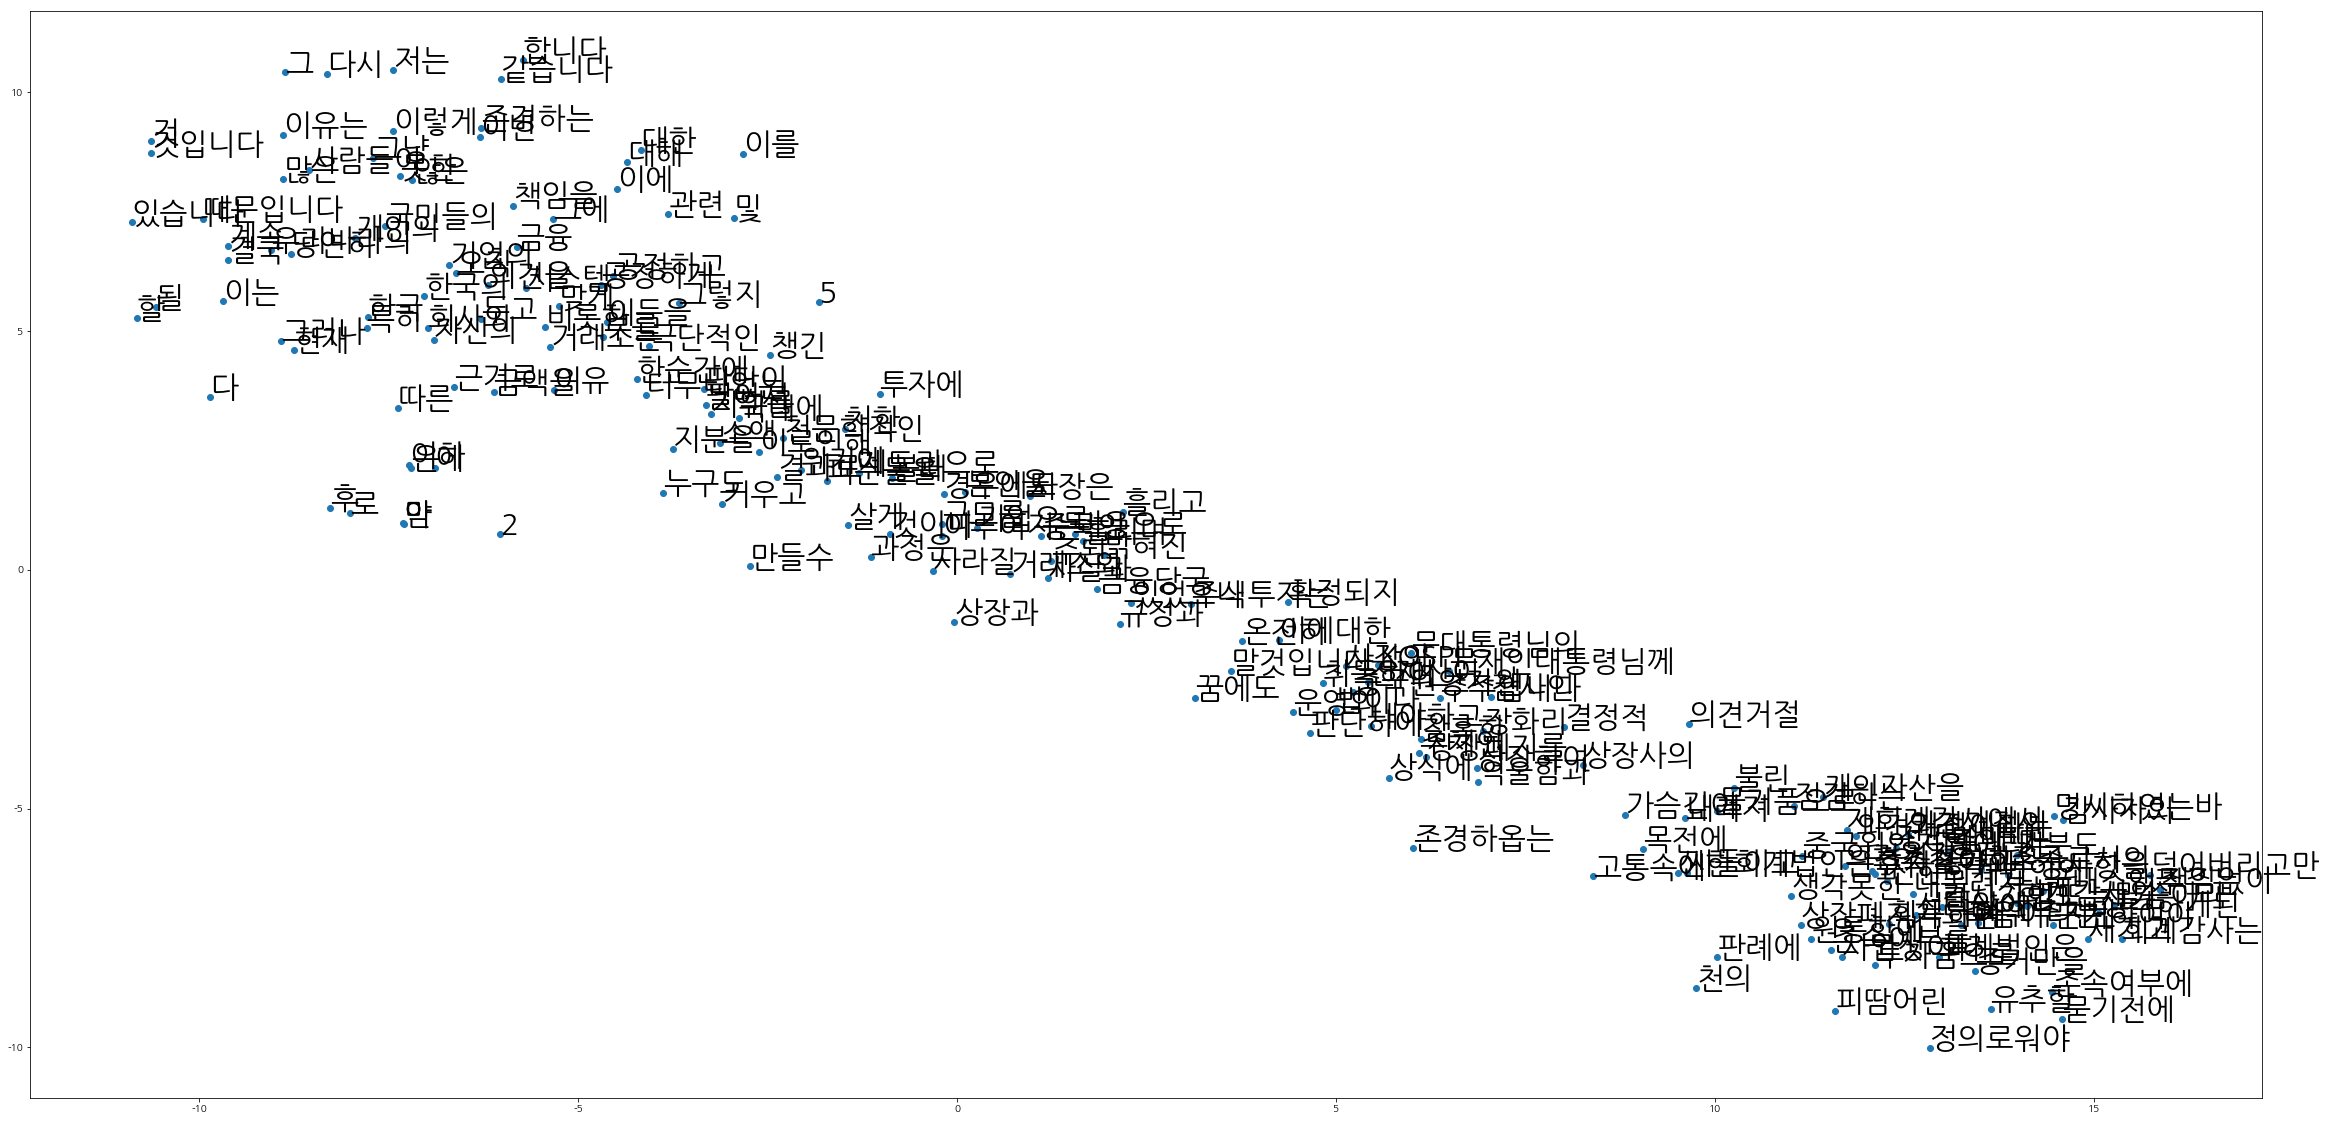

In [43]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()